# <font color='blue'>Lab 5 - CCPS 844 Data Mining</font>
# <font color='green'>Salman AlMaskati</font>

### <font color='red'> Make sure you understand this script and answer the questions provided at the bebining or in the empty cells (at the end of each question) and submit a PDF file on the D2L.</font>

## Hierarchical clustering of the grain data

**Step 1:** Load the dataset _(done for you)_.

In [1]:
import pandas as pd

seeds_df = pd.read_csv('seeds-less-rows.csv')

# remove the grain species from the DataFrame, save for later
varieties = list(seeds_df.pop('grain_variety'))

# extract the measurements as a NumPy array
samples = seeds_df.values

varieties

['Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat']

**Step 2:** Import:

 + `linkage` and `dendrogram` from `scipy.cluster.hierarchy`.
 + `matplotlib.pyplot` as `plt`.

In [3]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

**Step 3:** Perform hierarchical clustering on `samples` using the `linkage()` function with the `method='complete'` keyword argument. Assign the result to `mergings`.

In [4]:
mergings = linkage(samples, method='complete')

**Step 4:** Plot a dendrogram using the `dendrogram()` function on `mergings`, specifying the keyword arguments `labels=varieties`, `leaf_rotation=90`, and `leaf_font_size=6`.  Remember to call `plt.show()` afterwards, to display your plot.

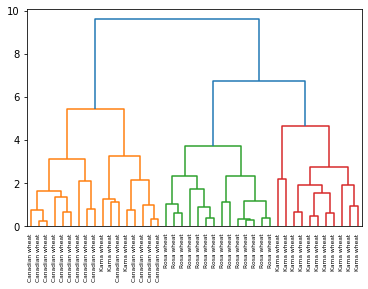

In [5]:
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

# Q1: Use single link method to calculate the mergings and plot the dendrogram

In [8]:
s_mergings = linkage(samples, method='single')

# Hierarchies of stocks

**Step 1:** Load the data _(written for you)_

In [9]:
import pandas as pd

fn = 'company-stock-movements-2010-2015-incl.csv'
stocks_df = pd.read_csv(fn, index_col=0)

companies = list(stocks_df.index)
movements = stocks_df.values

**Step 2:** Make the necessary imports:

 + `normalize` from `sklearn.preprocessing`.
 + `linkage` and `dendrogram` from `scipy.cluster.hierarchy`.
 + `matplotlib.pyplot` as `plt`.

In [10]:
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

**Step 3:** Rescale the price movements for each stock by using the `normalize()` function on `movements`.

In [11]:
normalized_movements = normalize(movements)

**Step 4:** Apply the `linkage()` function to `normalized_movements`, using `'complete'` linkage, to calculate the hierarchical clustering. Assign the result to `mergings`.

In [12]:
mergings = linkage(normalized_movements, method='complete')

**Step 5:** Plot a dendrogram of the hierarchical clustering, using the list `companies` of company names as the `labels`. In addition, specify the `leaf_rotation=90`, and `leaf_font_size=10` keyword arguments as you did in the previous exercise.

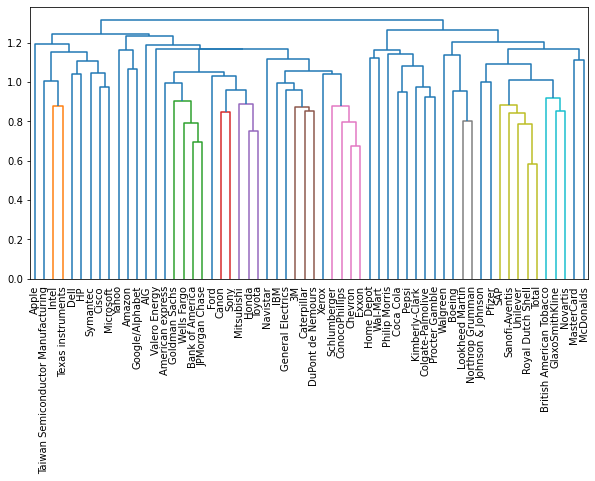

In [13]:
# the first line sets the size of your plot
plt.figure(figsize=(10, 5))

dendrogram(
    mergings,
    labels=companies,
    leaf_rotation=90.,
    leaf_font_size=10
)
plt.show()

# Q2: what is the functionality of the 
* normalize function
* figsize
* leaf_rotation
* leaf_font_size

Normalize function: Rescales and organizes the dataframe

figsize: the size of the figure, figsize(10,5) sets the height to 5 inchs and width to 10 

leaf_rotaion: the angel in which to rotate the leaf labels (in degrees)

leaf_font_size: the text size of the leaf label.

# Different linkage, different hierarchical clustering!

Now, perform a hierarchical clustering of the voting countries with `'single'` linkage, and compare the resulting dendrogram.  Different linkage, different hierarchical clustering!

First, we need to do a little pre-processing to account for one of the Eurovision rules: countries are not allowed to vote for themselves.

**Step 1:** Load the DataFrame _(written for you)_

In [12]:
import pandas as pd

scores_df = pd.read_csv('eurovision-2016-televoting.csv', index_col=0)
country_names = list(scores_df.index)

**Step 2:** Display the DataFrame, and have a look.  Each row represents a country that _voted_, while each column represents a country that _performed_.

Notice the NaN ("not-a-number") values.  These correspond to missing scores in the original CSV file.  These scores are missing because countries that performed were not allowed to vote for themselves.

In [13]:
scores_df.head()

,Armenia,Australia,Austria,Azerbaijan,Belgium,Bulgaria,Croatia,Cyprus,Czech Republic,France,...,Lithuania,Malta,Poland,Russia,Serbia,Spain,Sweden,The Netherlands,Ukraine,United Kingdom
From country,,,,,,,,,,,,,,,,,,,,,
Albania,2.0,12.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,...,4.0,0.0,5.0,7.0,0.0,0.0,3.0,0.0,6.0,0.0
Armenia,NaN,0.0,4.0,0.0,0.0,0.0,0.0,6.0,0.0,7.0,...,0.0,5.0,1.0,12.0,0.0,0.0,2.0,0.0,10.0,0.0
Australia,0.0,NaN,3.0,0.0,12.0,10.0,0.0,0.0,0.0,7.0,...,1.0,6.0,0.0,5.0,0.0,2.0,0.0,0.0,8.0,4.0
Austria,0.0,3.0,NaN,0.0,0.0,5.0,0.0,0.0,0.0,1.0,...,0.0,0.0,12.0,8.0,4.0,0.0,7.0,6.0,10.0,0.0
Azerbaijan,0.0,2.0,0.0,NaN,0.0,8.0,0.0,0.0,0.0,4.0,...,0.0,5.0,3.0,12.0,0.0,0.0,0.0,0.0,10.0,0.0


**Step 3:** Fill in the NaNs with the highest possible score (12) - we are assuming that countries would vote for themselves, if they had been allowed to do so. 

In [14]:
scores_df = scores_df.fillna(12)

What is the reson of doing this step (Step 3)?

It is important to have a clean data set when anlayzing, filling the NaNs is important because many machine learing algorithms cannot are not able to process NaN values, as well as if the NaN values remain in the dataframe the algorithms would not yeild accurate results

**Step 4:** Import the `normalize` function from `sklearn.preprocessing`.

In [16]:
from sklearn.preprocessing import normalize

**Step 5:** Apply the normalize function to `scores_df.values`, assigning the result to `samples`.

(Why do we need to normalize?  Because now that the missing values are filled with 12 points, some countries (those that performed) given a greater total number of points when voting.  The `normalize` function corrects for this.) 

In [17]:
samples = normalize(scores_df.values)

**Step 6:** Import:
 + `linkage` and `dendrogram` from `scipy.cluster.hierarchy`.
 + `matplotlib.pyplot` as `plt`.

In [18]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

**Step 7:** Perform hierarchical clustering on `samples` using the `linkage()` function with the `method='single'` keyword argument. Assign the result to `mergings`.

In [19]:
mergings = linkage(samples, method='single')

**Step 8:** Plot a dendrogram of the hierarchical clustering, using the list `country_names` as the `labels`. In addition, specify the `leaf_rotation=90`, and `leaf_font_size=6` keyword arguments as you have done earlier.

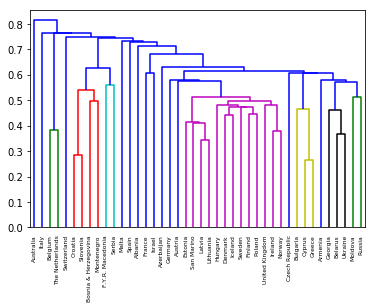

In [20]:
dendrogram(mergings,
           labels=country_names,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

**Step 9:** Compare your dendrogram created above to the ones created by different linkage functions. You might notie that different hierarchical clusterings producce different dendrograms.
All the linkage functions have advantages and disadvantages.  In practice, just try out all, and see which dendrogram seems more sensible. In your opinion, here which linkage function seems more sensible?

# Q3 In your opinion, here which linkage function seems more sensible?

In my opinion complete linkage seems more sensible, becuase it is less susceptible to noise and outliers, so it does well in sperating the clusters.

# Intermediate clusterings - how many clusters?

Consider the dendrogram below - it is the result of your hierarchical clustering of some of the grain samples.

**Question:** If the hierarchical clustering were stopped at height 6 on the dendrogram, how many clusters would there be?

**Hint:** Imagine a horizontal line at this height.

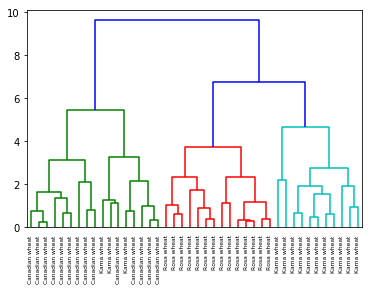

In [22]:
import pandas as pd

seeds_df = pd.read_csv('seeds-less-rows.csv')

# remove the grain species from the DataFrame, save for later
varieties = list(seeds_df.pop('grain_variety'))

# extract the measurements as a NumPy array
samples = seeds_df.values

from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

mergings = linkage(samples, method='complete')

dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

# Q4: If the hierarchical clustering were stopped at height 6 on the dendrogram, how many clusters would there be?


3 clusters

# Extracting the cluster labels

In the previous exercise, you saw that the intermediate clustering of the grain samples at height 6 has 3 clusters. Now, use the `fcluster()` function to extract the cluster labels for this intermediate clustering, and compare the labels with the grain varieties using a cross-tabulation.

**Step 1:** Load the dataset: _(written for you)_

In [24]:
import pandas as pd

seeds_df = pd.read_csv('seeds-less-rows.csv')

# remove the grain species from the DataFrame, save for later
varieties = list(seeds_df.pop('grain_variety'))

# extract the measurements as a NumPy array
samples = seeds_df.values

**Step 2:** Run the hierarchical clustering of the grain samples that you worked out earlier _(filled in here for you)._

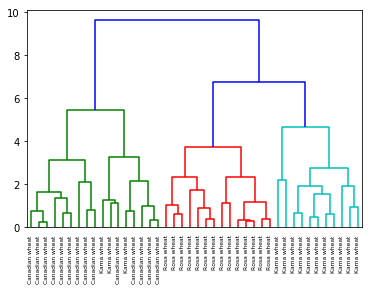

In [25]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

mergings = linkage(samples, method='complete')

dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

**Step 3:** Import `fcluster` from `scipy.cluster.hierarchy`.

In [26]:
from scipy.cluster.hierarchy import fcluster

**Step 4:** Obtain a flat clustering by using the `fcluster()` function on `mergings`. Specify a maximum height of `6` and the keyword argument `criterion='distance'`.  Assign the result to `labels`.

In [27]:
labels = fcluster(mergings, 6, criterion='distance')

**Step 5:** Create a DataFrame `df` with two columns named `'labels'` and `'varieties'`, using `labels` and `varieties`, respectively, for the column values.

In [28]:
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

**Step 6:** Create a cross-tabulation `ct` between `df['labels']` and `df['varieties']` to count the number of times each grain variety coincides with each cluster label.

In [29]:
ct = pd.crosstab(df['labels'], df['varieties'])

**Step 7:** Display `ct` to see how your cluster labels correspond to the wheat varieties.

In [30]:
ct

varieties,Canadian wheat,Kama wheat,Rosa wheat
labels,,,
1,14,3,0
2,0,0,14
3,0,11,0


# Q5: What you see in this table


I see a dataframe that shows how the cluster labels correspond to the differnt type of wheat